In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pwd # 현재 작업 중인 디렉토리 확인 (print working directory)

/Users/wonjunsik/study/kaggle/Titanic


# **데이터 읽어들이기**

In [4]:
!ls ../input/titanic

ls: ../input/titanic: No such file or directory


In [6]:
# train = pd.read_csv('../input/titanic/train.csv')
# test = pd.read_csv('../input/titanic/test.csv')
# gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
data = pd.concat([train, test], sort=False) # concat: 같은 포맷의 데이터 합치기

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
print(len(train), len(test), len(data))

891 418 1309


In [13]:
data.isnull().sum() # null값 개수 확인

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# ****특징량 엔지니어링****

In [20]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True) # 원 핫 인코딩

data['Embarked'].fillna(('S'), inplace=True) # null값 채우기
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

data['Fare'].fillna(np.mean(data['Fare']), inplace=True) # null값을 평균값으로 채우기

age_avg = data['Age'].mean()
age_std = data['Age'].std()

# 나이의 null값을 평균-표준편차, 평균+표준편차 사이 정수로 랜덤하게 채우기
# data['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std), inplace=True)

# 랜덤하지 않게 바꾸기
data['Age'].fillna(data['Age'].median(), inplace=True)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1


In [22]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True) # 필요없는 열 삭제

In [23]:
data.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
413,NaN,3,0,28.0,8.0500,0,1,1
414,NaN,1,1,39.0,108.9000,1,1,1
415,NaN,3,0,38.5,7.2500,0,1,1
416,NaN,3,0,28.0,8.0500,0,1,1
417,NaN,3,0,28.0,22.3583,1,3,0


In [24]:
train = data[:len(train)]
test = data[len(train):]

In [25]:
y_train = train['Survived'] # 정답(y)
X_train = train.drop('Survived', axis=1) # 정답을 제외한 데이터(x)
X_test = test.drop('Survived', axis=1)
# 우리가 구하고 싶은 최종 목적이 y_train이지!!

In [26]:
print(y_train)
print('********************************************')
print(X_train)
print('********************************************')
print(X_test)

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64
********************************************
     Pclass  Sex   Age     Fare  Embarked  FamilySize  IsAlone
0         3    0  22.0   7.2500         0           2        0
1         1    1  38.0  71.2833         1           2        0
2         3    1  26.0   7.9250         0           1        1
3         1    1  35.0  53.1000         0           2        0
4         3    0  35.0   8.0500         0           1        1
..      ...  ...   ...      ...       ...         ...      ...
886       2    0  27.0  13.0000         0           1        1
887       1    1  19.0  30.0000         0           1        1
888       3    1  28.0  23.4500         0           4        0
889       1    0  26.0  30.0000         1           1        1
890       3    0  32.0   7.7500         2           1        1

[891 rows x 7 columns]
**********

# **머신러닝 알고리즘**

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# We call our estimator instance clf, as it is a classifier.
clf = LogisticRegression(penalty='l2', solver='sag', random_state=0)

In [29]:
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=0, solver='sag')

In [22]:
# y_pred = clf.predict(X_test)

In [23]:
# y_pred[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.])

# **가설을 기반으로 새로운 특징량 만들기**

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

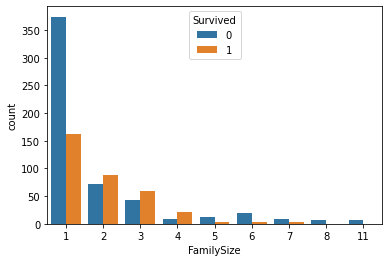

In [16]:
import seaborn as sns

# 본인까지 포함하느라 +1
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1

train['FamilySize'] = data['FamilySize'][:len(train)]
test['FamilySize'] = data['FamilySize'][len(train):]
sns.countplot(x='FamilySize', data = train, hue='Survived')

In [30]:
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

train['IsAlone'] = data['IsAlone'][:len(train)]
test['IsAlone'] = data['IsAlone'][len(train):]

/var/folders/h4/qkygjbx150l41hr_cmr5wpt80000gn/T/ipykernel_21176/678276647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['IsAlone'] = data['IsAlone'][:len(train)]
/var/folders/h4/qkygjbx150l41hr_cmr5wpt80000gn/T/ipykernel_21176/678276647.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['IsAlone'] = data['IsAlone'][len(train):]


# **제출**

In [31]:
# sub = pd.read_csv('../input/titanic/gender_submission.csv')
sub = pd.read_csv('gender_submission.csv')

clf.fit(X_train, y_train)
y_pred_familysize_isalone = clf.predict(X_test)

sub['Survived'] = list(map(int, y_pred_familysize_isalone))
sub.to_csv('submission_familysize_isalone.csv', index=False)

sub.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
